<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/LSTM_GTU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Long Short-Term Memory Networks (LSTMs)** are a type of recurrent neural network (RNN) designed to handle the vanishing gradient problem, which standard RNNs struggle with when learning long-term dependencies. They were introduced by Hochreiter and Schmidhuber (1997) to improve sequence modeling tasks such as speech recognition, time series forecasting, and natural language processing (NLP).

**Why Do We Need LSTMs?**
Standard RNNs suffer from the vanishing and exploding gradient problem, making them ineffective at learning long-range dependencies in sequential data. LSTMs solve this by introducing a memory cell and gates to control the flow of information.

**LSTM Architecture**
An LSTM unit consists of four key components:
1.  **Cell State (Ct)** - The "memory" of the network that carries long-term information across time steps.
2.  **Forget Gate (ft)** - Decides how much past information should be forgotten.
3.  **Input Gate (𝑖𝑡)** - Decides how much new information should be added to the memory.
4.  Output Gate (𝑜𝑡) – Decides what the next hidden state (ℎ𝑡) should.

Each gate is controlled using a sigmoid activation function (σ), which outputs values between 0 and 1, determining how much information should pass through.

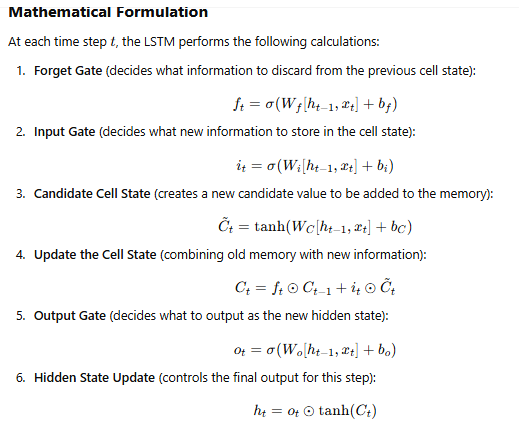

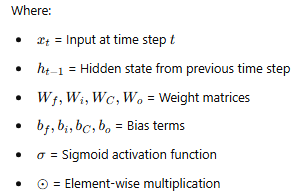

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model=Sequential(
    [
        LSTM(50, return_sequences=True, input_shape=(100,1)), # 100 time steps, 1 feature
        LSTM(50, return_sequences=False),
        Dense(1, activation='linear')
    ]
)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

**Limitations of LSTMs**
1.  **Computationally expensive:** Due to multiple gates and memory cells.
2.  **Difficult to parallelize:** Due to sequential dependencies.
3.  **Not always the best choice:** For very long sequences, Transformers (like in GPT models) often outperform LSTMs.

**Gated Recurrent Units (GRUs)** are a type of recurrent neural network (RNN) designed to address the vanishing gradient problem and improve long-term dependencies, similar to Long Short-Term Memory (LSTM) networks. GRUs were introduced by Cho et al. (2014) as a simpler alternative to LSTMs.

**Why Do We Need GRUs**?
While LSTMs effectively handle long-term dependencies, they are computationally expensive due to multiple gates and a cell state. GRUs simplify this by using fewer gates while still retaining long-term dependencies efficiently.

**GRU Architecture**

GRUs have two main gates:

1.  Update Gate (𝑧𝑡) – Decides how much past information to keep.
2.  Reset Gate (𝑟𝑡) – Decides how much of the past information to forget.

Instead of a separate memory cell like LSTMs, GRUs update the hidden state directly.

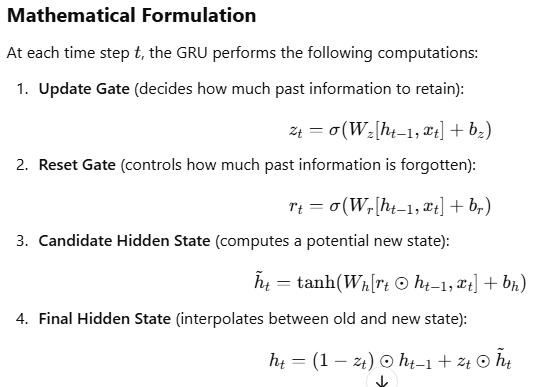
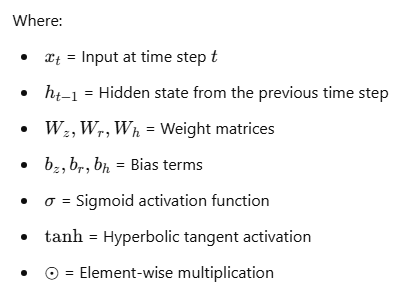




In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model_gru=Sequential([
    GRU(50,return_sequences=True, input_shape=(100,1)),
    GRU(50, return_sequences=False),
    Dense(1,activation='sigmoid')
])
model_gru.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 100, 50)             │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

✅ Limitations of RNNs/LSTMs/GRUs
1.  **Sequential Processing is Slow**

*  RNNs process one word at a time → cannot be parallelized.
*  Training on large datasets (e.g., Wikipedia, books) takes too long.
2.  **Struggles with Long Dependencies**

*  LSTMs solve the vanishing gradient problem to some extent but still struggle with very long sequences.
3.  **No Direct Word-to-Word Interaction**

*  In an RNN/LSTM, later words depend only on past words → limited flexibility.
*  Example: In "The cat sat on the mat," the first word "The" cannot directly influence "mat".

💡 **Solution: Transformers!**
*  *Parallel Processing* – Entire sentences are processed at once.
*  *Better Long-Range Dependencies* – Uses Self-Attention to connect all words.
*  *State-of-the-Art NLP Performance* – Used in GPT, BERT, T5, etc